<a href="https://colab.research.google.com/github/MSaber7/Machine-Learning/blob/master/ImageRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Processing RGB (By Numpy)

In [0]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
def ecc(img_1,img_2):
    sz = img_1.shape
    # Define the motion model
    warp_mode = cv2.MOTION_TRANSLATION

    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY:
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else:
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Specify the number of iterations.
    number_of_iterations = 5000

    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10

    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC(img_1, img_2, warp_matrix, warp_mode, criteria)

    if warp_mode == cv2.MOTION_HOMOGRAPHY:
        # Use warpPerspective for Homography
        img_2_aligned = cv2.warpPerspective(img_2, warp_matrix, (sz[1], sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
        # Use warpAffine for Translation, Euclidean and Affine
        img_2_aligned = cv2.warpAffine(img_2, warp_matrix, (sz[1], sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

    return img_2_aligned


In [0]:
raw_img = cv2.imread('data/00.png')

(1075, 419)


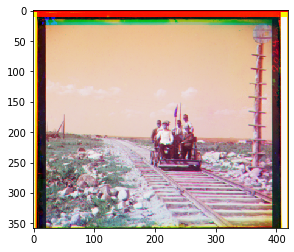

(1024, 398)


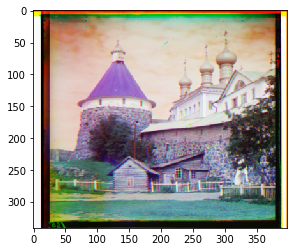

(1074, 409)


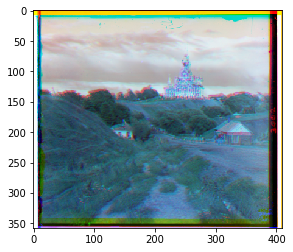

(1166, 449)


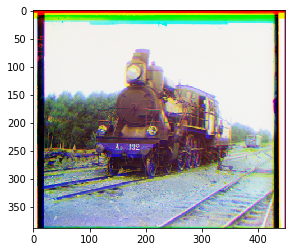

(1153, 445)


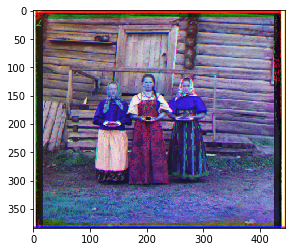

(1159, 449)


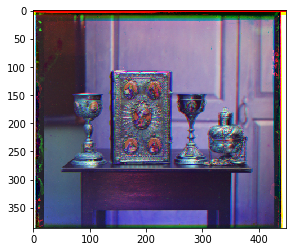

(1165, 452)


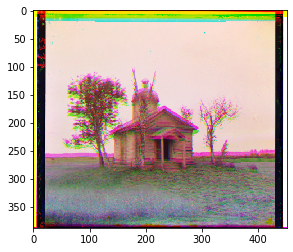

(1064, 412)


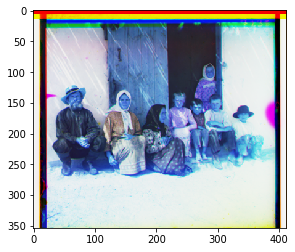

(1162, 449)


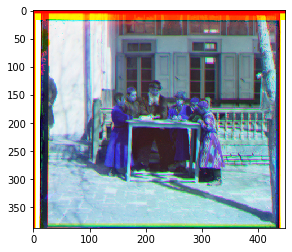

(1155, 444)


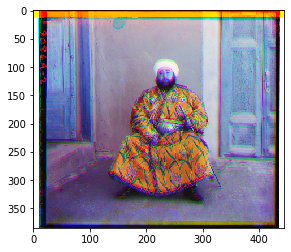

In [0]:
img_path = "data"
for item in os.listdir(img_path):
    raw_img = cv2.imread(img_path+'/'+item, flags=0)
    dim = list(raw_img.shape)
    print(raw_img.shape)
    if dim[0] % 3 == 0:
        pass
    else:
        dim[0] = dim[0] - dim[0] % 3
    raw_img.resize((dim[0], dim[1]))
    img_B = raw_img[0:(int(dim[0] / 3)), 0:dim[1]]
    img_G = raw_img[(int(dim[0] / 3)):(int(dim[0] * 2 / 3)), 0:dim[1]]
    img_R = raw_img[(int(dim[0] * 2 / 3)):dim[0], 0:dim[1]]

    img_G_warped = ecc(img_B,img_G)
    img_R_warped = ecc(img_B,img_R)
    img_BGR = cv2.merge([img_B,img_G_warped, img_R_warped])
    #cv2.namedWindow('BGR_img',cv2.WINDOW_NORMAL)
    #plt.figure()
    plt.imshow(img_BGR)
    plt.show()
#     cv2.imshow('BGR_img', img_BGR)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()